Step 1. Look at the big picture and fram the problem
Define the objective in business terms. 
To create an linear regression model that predicts future profits and makes a risk analysis for 50 different startup companies in order for investors to 

How shall your solution be used? 
Solution can be optimized among giving investors an insight to which startup companies can bring profit
User Story: As an investor I want to see which company has the lowest chance of failing because I want to invest in them.

How should you frame this problem (supervised/unsupervised, online/offline, etc.)? Action: You may re-address chapter 1 for these concepts.
Since we are working with Linear Regression here, we are under the category of supervised learning.

How should performance be measured? Action: First of all select at measure that goes with the way you framed the problem – RMSE, Confusion matrix or something else. 
Performance should be measured through resulting correlations (calculated through using RMSE and residuals) which will also produce result for a risk analysis model

Is the performance measure aligned with the business objective? Action: Discuss whether your performance measure makes sense regarding your business objective.
Yes, as making valid predictions to a specific companies profit rates together with a risk analysis model will bring a major benefit to investors who want to invest in startup companies.

What are comparable problems? Can you reuse experience? Action: Reuse all the stuff and tools you know – especially, what you learned from chapter 2 
Familiarity with using pandas and matplotlib will help us in exploring and visualizing the data whereas the statistical calculations will allow us to understand what needs to be done to produce accurate results.

List the assumptions you (or others have made so far) Action: Figure out what assumptions you actually made Note: Some assumptions have already been made in the case description. Which?
Assumptions made:  Few companies have some data set to 0.0


Step 2. 
Get the dataGet the data
Convert the data to a format you can easily manipulate (without changing the data itself).

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import parker
import seaborn as sns
from zlib import crc32
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Read the CSV file
dataset = pd.read_csv('Data/50_Startups.csv')

# lets check the first five rows of dataset
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
print('Data set type:')
print(type(dataset))

# Check the size and type of data (time series, sample, geographical, etc.).
print('Data set info:')
print(dataset.info())


Data set type:
<class 'pandas.core.frame.DataFrame'>
Data set info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


In [7]:
print('States with count:')
print(dataset["State"].value_counts())

States with count:
New York      17
California    17
Florida       16
Name: State, dtype: int64


In [8]:
print('Data set description:')
print(dataset.describe())

Data set description:
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


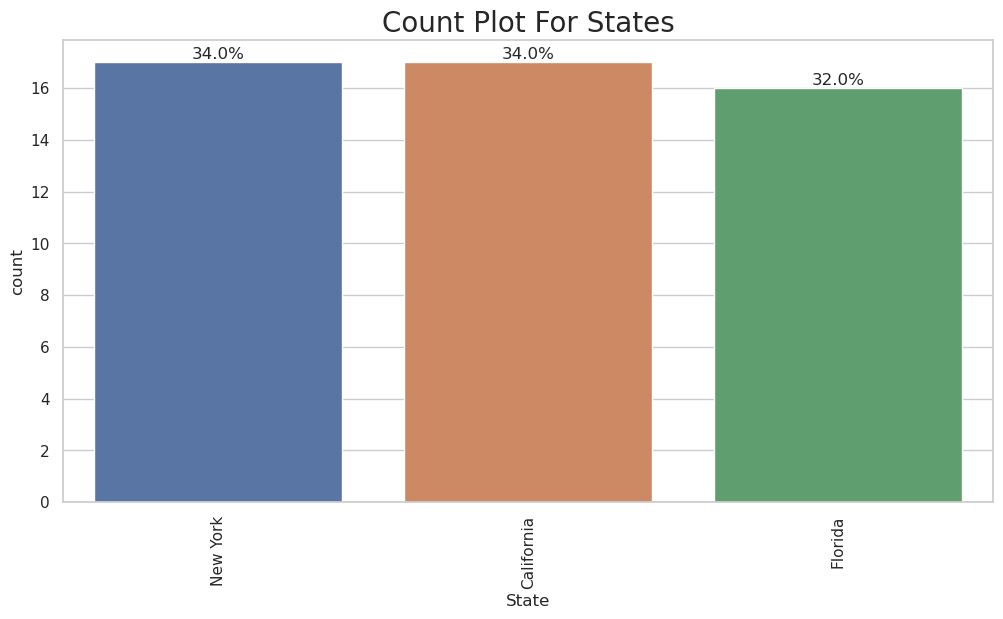

In [11]:
#check count based on categorical features
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
total = float(len(dataset))
ax = sns.countplot(x="State", data=dataset)
plt.xticks(rotation=90)
plt.title("Count Plot For States", fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='bottom')
plt.show()



State with florida has less number of records in given dataset.



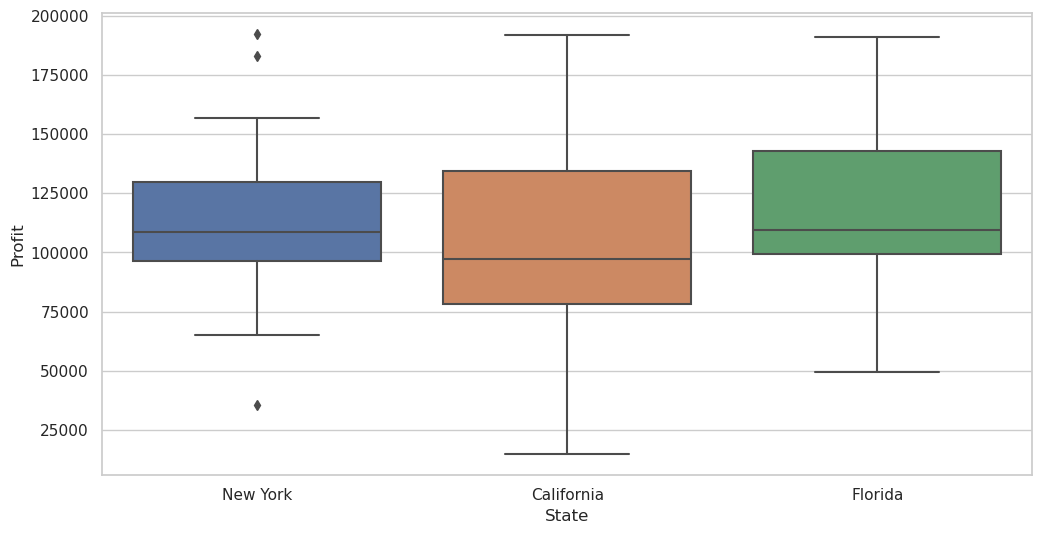

In [13]:
#Find out the relationship between categorical variable and dependent varaible
plt.figure(figsize=(12, 6))
fig = sns.boxplot(x='State', y="Profit", data=dataset.sort_values('Profit',ascending=False))
plt.show()

It seems startup in state of California has less profits than others two states.



Information was gathered on 50 business startups from New York, California, and Florida. The variables examined in this dataset were R&D expenditure, administration expenses, and marketing expenditure, all of which are independent variables. 
Profit was the dependent variable.

<Figure size 2000x1000 with 0 Axes>

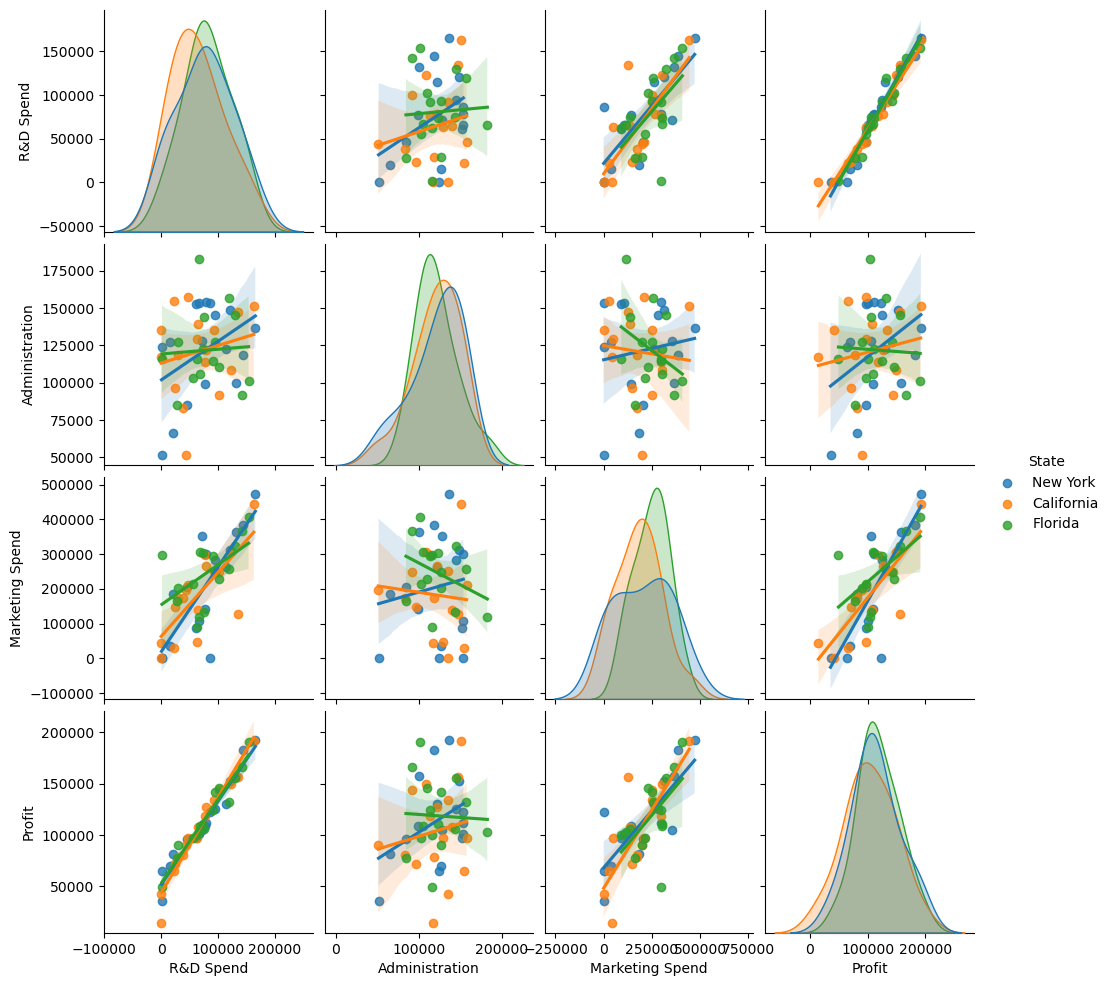

In [ ]:
# Visualize the data
plt.figure(figsize=(20,10))
sns.pairplot(data=dataset,hue='State',kind='reg')
plt.show()

 Inferences from data visualizations:

1. The plot displays different colored regression lines indicating that in all states, there is a positive correlation between research and development expenditure and profit.
2. In New York, the impact of administration expenses on profit is positive, while it is moderately positive in California but slightly negative in Florida.
3. All three states demonstrate a positive correlation between marketing expenditure and profit.

<Figure size 1500x700 with 0 Axes>

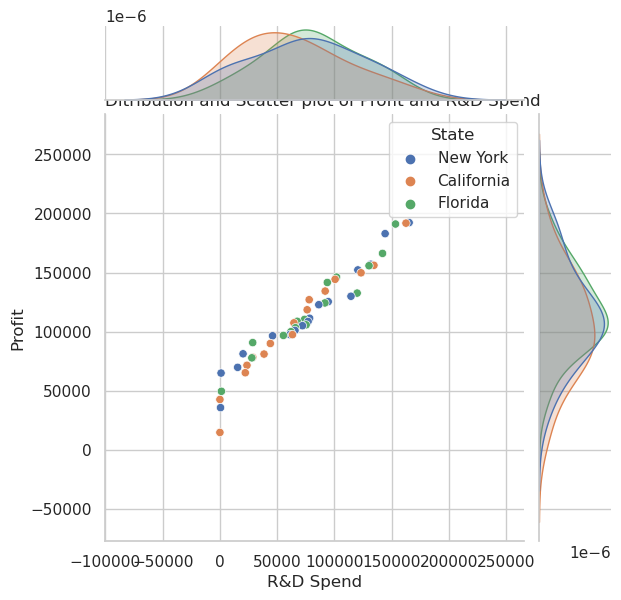

<Figure size 1500x700 with 0 Axes>

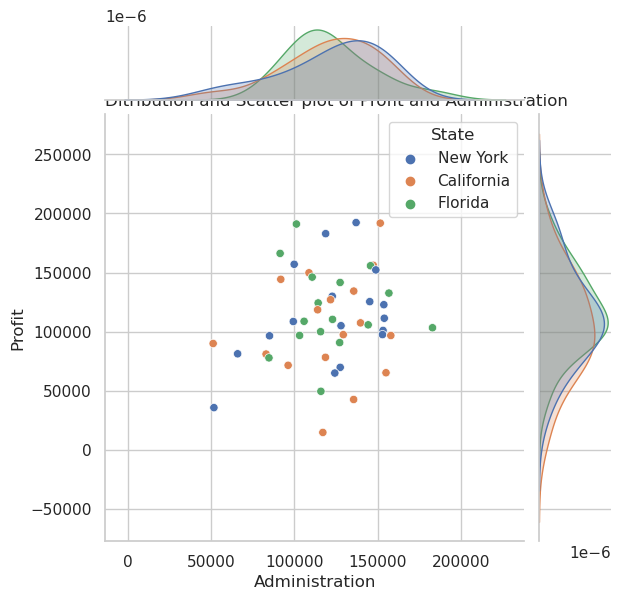

<Figure size 1500x700 with 0 Axes>

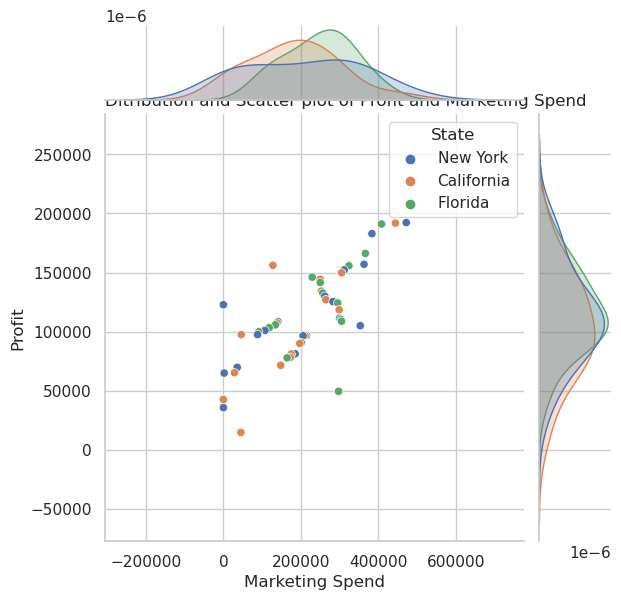

In [23]:
cols=['R&D Spend','Administration','Marketing Spend']
for col in cols:
    plt.figure(figsize=(15,7))
    sns.jointplot(data=dataset,y='Profit',x=col,hue='State',kind='scatter')
    plt.title(label='Ditribution and Scatter plot of Profit and '+col,loc='left')
    plt.show()

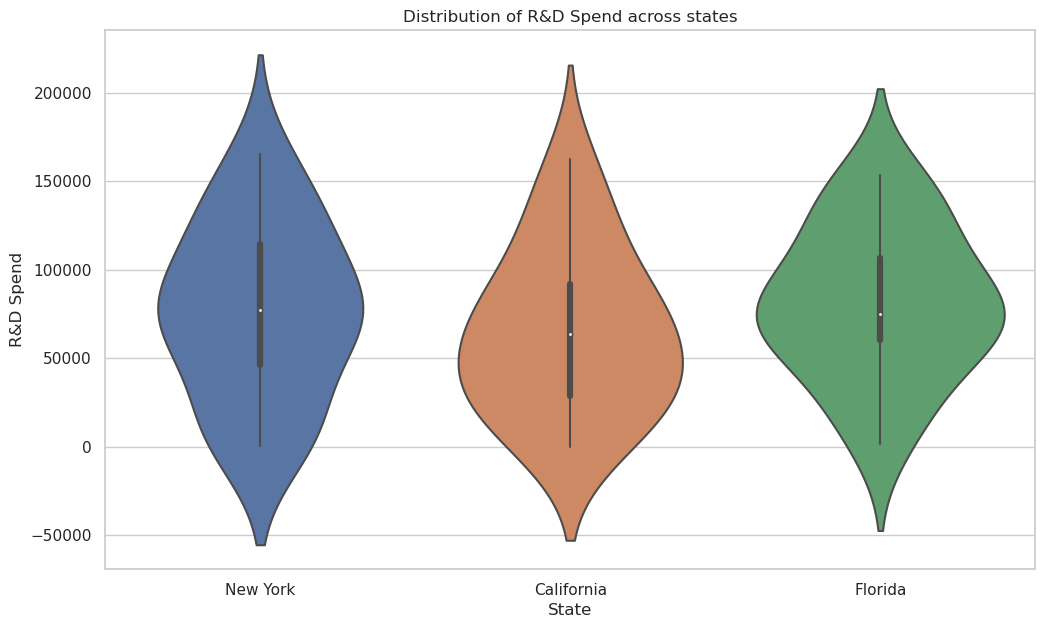

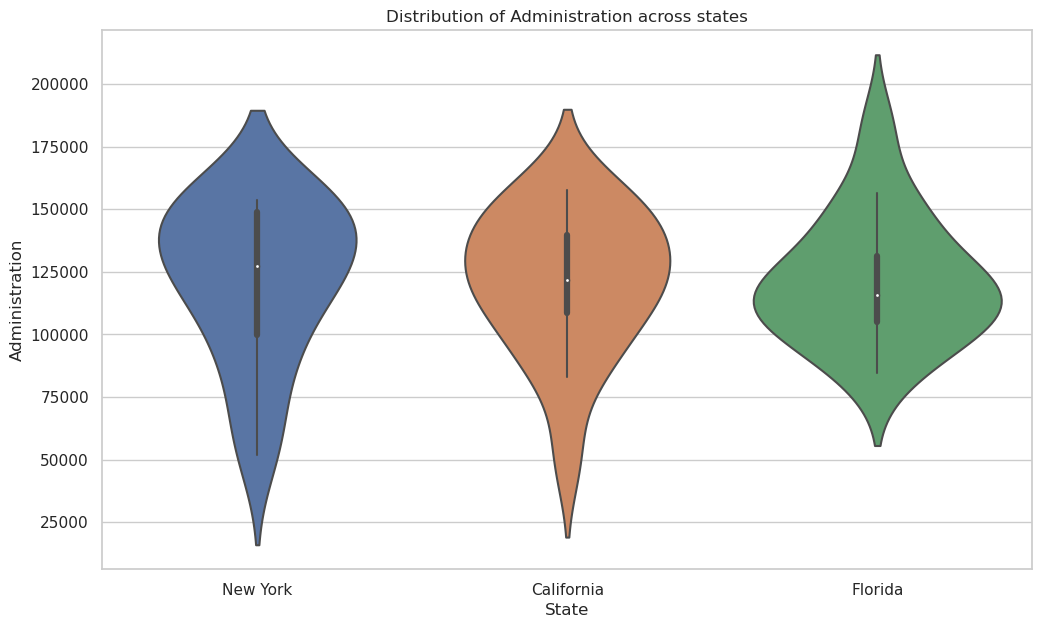

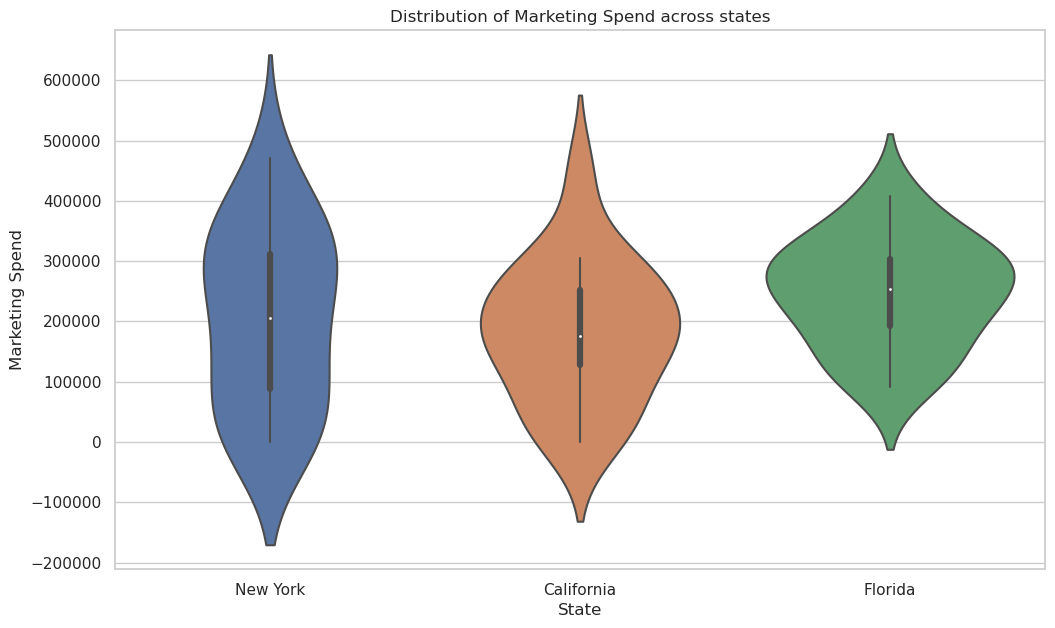

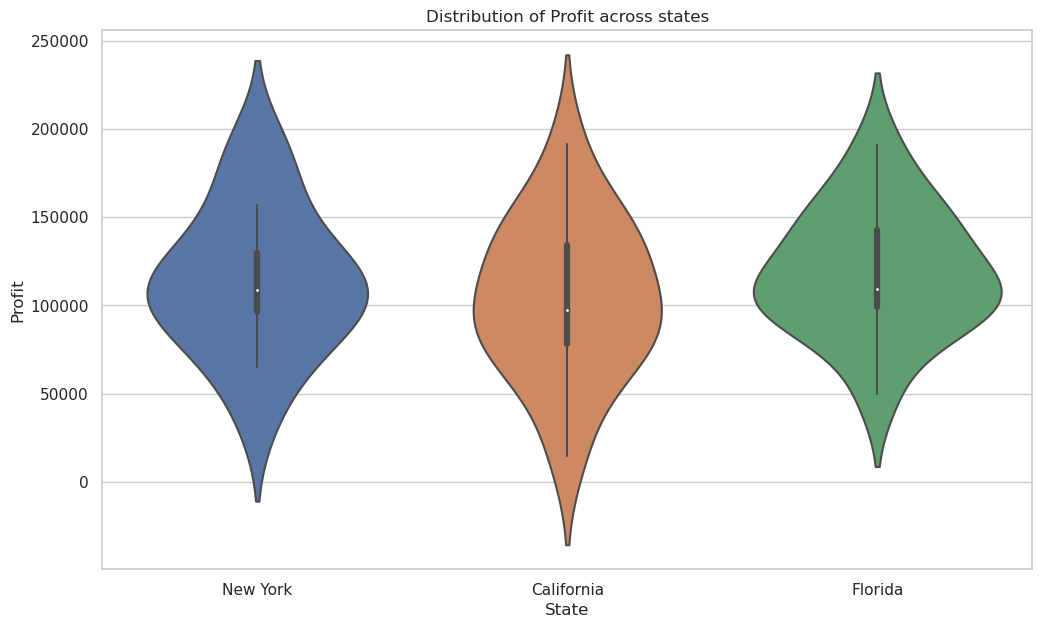

In [19]:
#For loops to create distribution of expenses and profit plots across states
cols=['R&D Spend','Administration','Marketing Spend','Profit']
for col in cols:
    plt.figure(figsize=(12,7))
    sns.violinplot(data=dataset,x='State',y=col)
    plt.title('Distribution of '+col+' across states')
    plt.show()

In [ ]:
# Importing the OneHotEncoder module from the sklearn.preprocessing library
from sklearn.preprocessing import OneHotEncoder

# Instantiating an instance of the OneHotEncoder class and setting sparse=False to return a numpy array instead of a sparse matrix
ohe = OneHotEncoder(sparse=False)

# Using the fit_transform method of the OneHotEncoder object to transform the 'State' column of the dataset into one-hot encoded representation
transformed = ohe.fit_transform(dataset[['State']])

# Retrieving the categories used for one-hot encoding from the OneHotEncoder object
ohe.categories_


[array(['California', 'Florida', 'New York'], dtype=object)]

In [ ]:
# Adding the one-hot encoded features to the original dataset by creating new columns with the categories and setting them equal to the transformed numpy array
dataset[ohe.categories_[0]] = transformed

# Displaying the first few rows of the updated dataset to verify the transformation was successful
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,California,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,Florida,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,New York,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,Florida,166187.94,0.0,1.0,0.0


Create a test set, put it aside, and never look at it (no data snooping!).
A problem here is that the data set is small -> Use stratification.
Action: Make stratified test and learning sets (1 fold).
Code is to be established in your notebook.


In [ ]:
# Drop orginal state column and label 
X=dataset.drop(['Profit','State'],axis=1)

X.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,0.0,1.0,0.0


In [ ]:
# Drop orginal state column and label 
y=dataset['Profit']

y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [ ]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, shuffle=True, random_state=123)
print(X_train.shape)
print(X_test.shape) 

print("test set using train_test_split from sklearn")
print("X test")
print(X_test.head())
print("----------------------------------------------------------------------------")
print("y test")
print(y_test.head())

(35, 6)
(15, 6)
test set using train_test_split from sklearn
X test
    R&D Spend  Administration  Marketing Spend  California  Florida  New York
10  101913.08       110594.11        229160.95         0.0      1.0       0.0
13   91992.39       135495.07        252664.93         1.0      0.0       0.0
30   61994.48       115641.28         91131.24         0.0      1.0       0.0
46    1315.46       115816.21        297114.46         0.0      1.0       0.0
18   91749.16       114175.79        294919.57         0.0      1.0       0.0
----------------------------------------------------------------------------
y test
10    146121.95
13    134307.35
30     99937.59
46     49490.75
18    124266.90
Name: Profit, dtype: float64


In [ ]:
# Merging x and y values into test and training sets
train_set = X_train.join(y_train)

train_set.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York,Profit
1,162597.70,151377.59,443898.53,1.0,0.0,0.0,191792.06
6,134615.46,147198.87,127716.82,1.0,0.0,0.0,156122.51
27,72107.60,127864.55,353183.81,0.0,0.0,1.0,105008.31
49,0.00,116983.80,45173.06,1.0,0.0,0.0,14681.40
24,77044.01,99281.34,140574.81,0.0,0.0,1.0,108552.04


STEP 3.
Explore the Data
Experementing with Attribute Combinations

In [ ]:
# Show the unique values
dataset.nunique()

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
California          2
Florida             2
New York            2
dtype: int64

In [ ]:
# Show the dataypes
dataset.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
California         float64
Florida            float64
New York           float64
dtype: object

In [ ]:
# Correlations for training set
corr_train = train_set.corr()

# Display Correlations of profit only
corr_train['Profit'].sort_values(ascending=False)


Profit             1.000000
R&D Spend          0.965574
Marketing Spend    0.758718
Florida            0.259502
Administration     0.244029
California        -0.093553
New York          -0.151745
Name: Profit, dtype: float64

 Find Missing Values

In [ ]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
California         0
Florida            0
New York           0
dtype: int64

We can see that there are no missing values

Explore the Correlation between numerical features

In [ ]:
# Get the correlations of the data
corr = dataset.corr()

# Display Correlations of profit only
print("Correlations of profit only:")
corr['Profit'].sort_values(ascending=False)

Correlations of profit only:


Profit             1.000000
R&D Spend          0.972900
Marketing Spend    0.747766
Administration     0.200717
Florida            0.116244
New York           0.031368
California        -0.145837
Name: Profit, dtype: float64

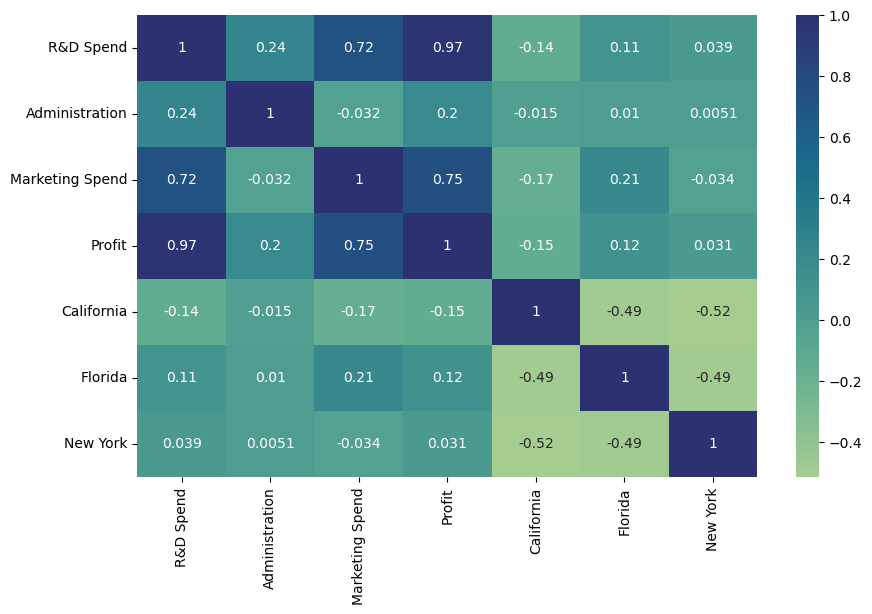

In [ ]:
# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.corr(), annot=True, cmap='crest')
plt.show()

R&D Spend and marketing spend seem to be the most correlated features



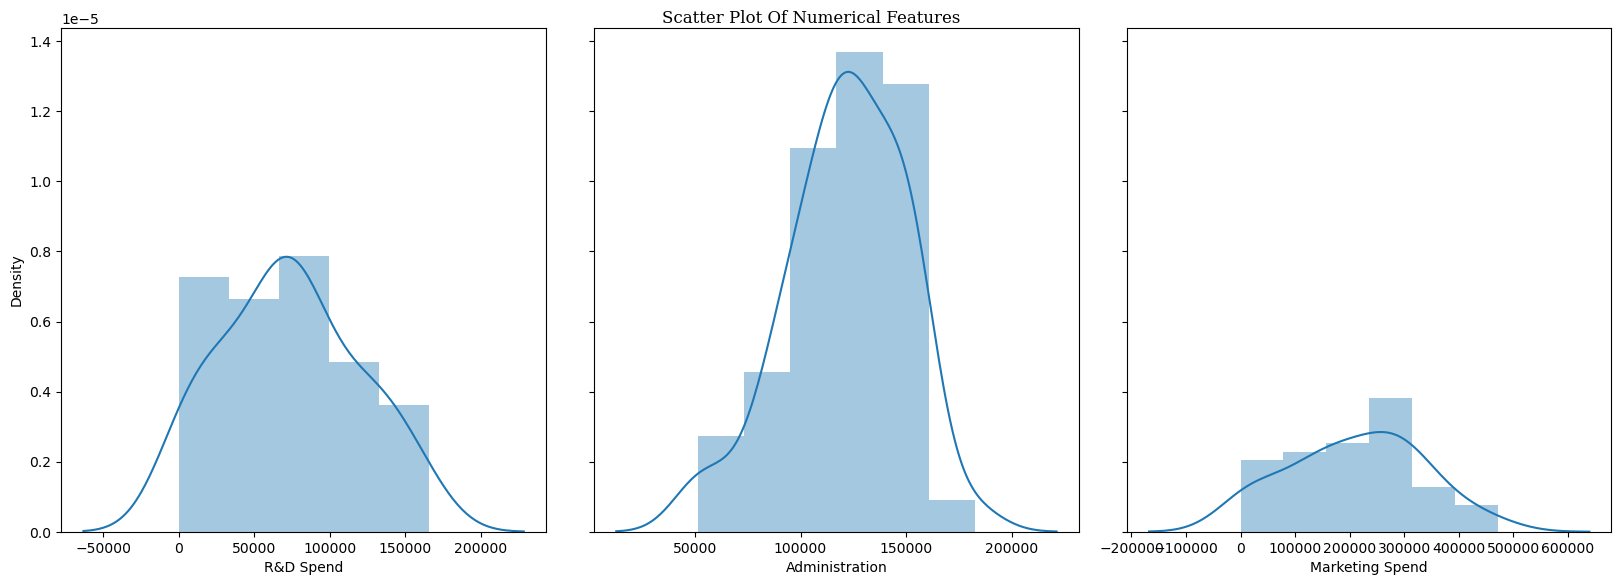

In [ ]:
# Define a dictionary with font specifications for the title
font = {'family': 'Serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

# Define a list of continuous feature names
continuous_features = ['R&D Spend', 'Administration', 'Marketing Spend']

# Create a figure with 1 row and 3 columns, with a shared y-axis and a specific size
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Adjust the spacing between subplots and add a title to the figure
fig.subplots_adjust(wspace=0.1, hspace=0.3)
fig.suptitle('Scatter Plot Of Numerical Features', fontdict=font)
fig.subplots_adjust(top=0.95)

# Flatten the axes array for easier iteration
axes = axes.ravel()

# Iterate over continuous features in the dataset and plot the distribution using log transformation
for i, col in enumerate(continuous_features):
    sns.distplot(dataset[col], ax=axes[i])

it seems all continuous features are normally distributed.



Relation between Continuous numerical Features and Labels

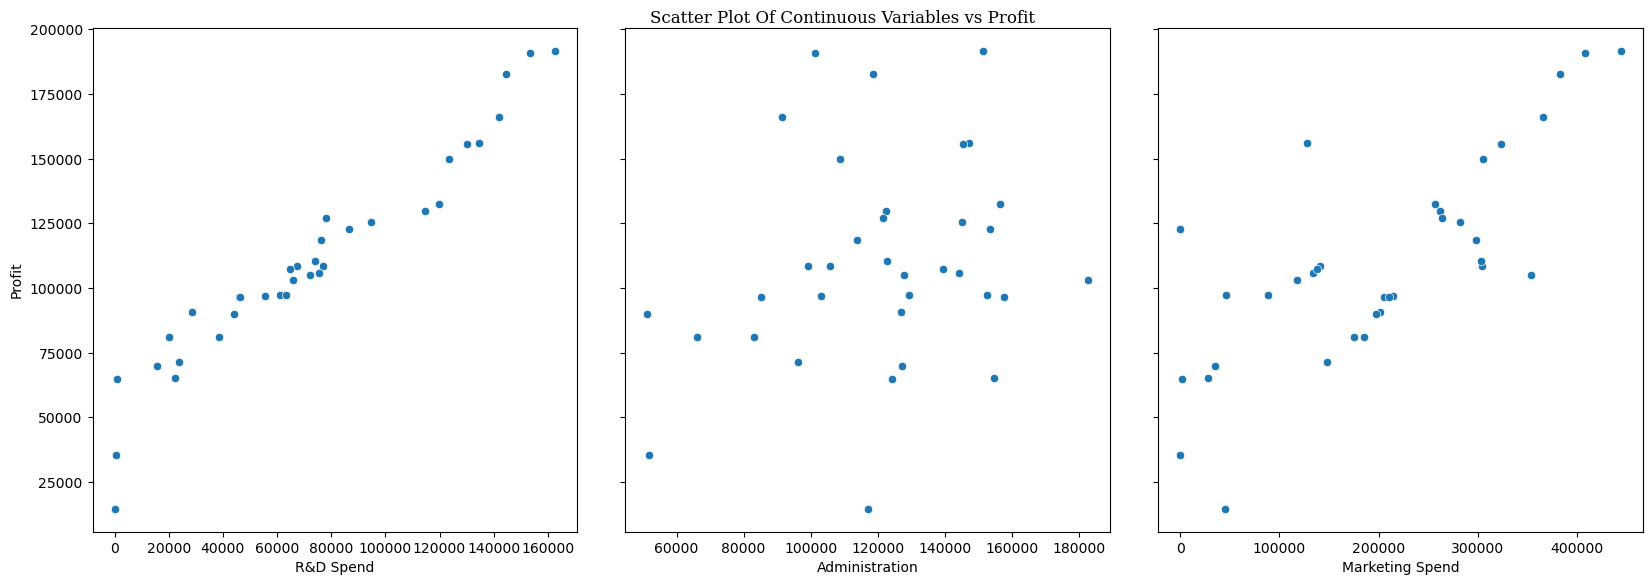

In [ ]:
# Create a figure with 1 row and 3 columns, with a shared y-axis and a specific size
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Adjust the spacing between subplots and add a title to the figure
fig.subplots_adjust(wspace=0.1, hspace=0.3)
fig.suptitle('Scatter Plot Of Continuous Variables vs Profit', fontdict=font)
fig.subplots_adjust(top=0.95)

# Flatten the axes array for easier iteration
axes = axes.ravel()

# Iterate over continuous features in the training set and create scatter plots
for i, col in enumerate(continuous_features):
    x = train_set[col]
    y = train_set['Profit']
    sns.scatterplot(x=x, y=y, ax=axes[i])

It appears that there is a linear relationship between the Profit feature and both R&D Spend and Marketing Spend features.

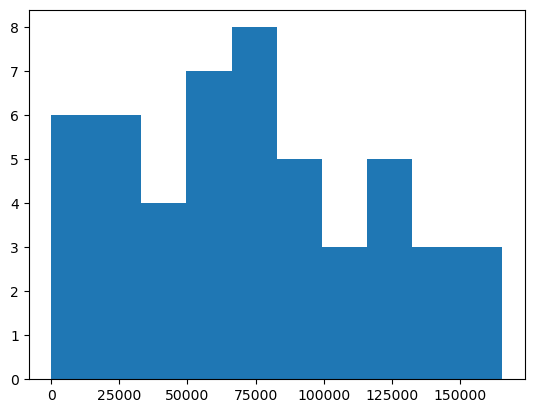

In [ ]:
# Histogram of R&D spend
plt.hist(data=dataset,x='R&D Spend')
plt.show()

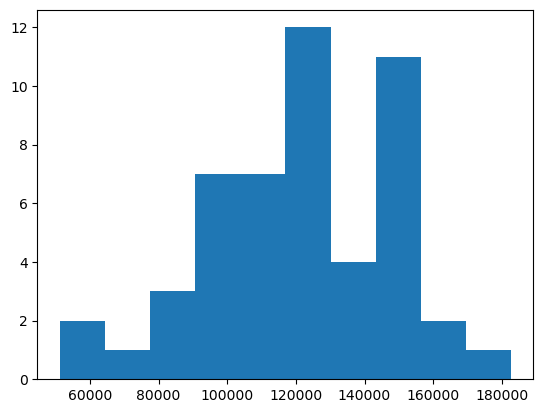

In [ ]:
# Histogram of Administrations
plt.hist(data=dataset,x='Administration')
plt.show()

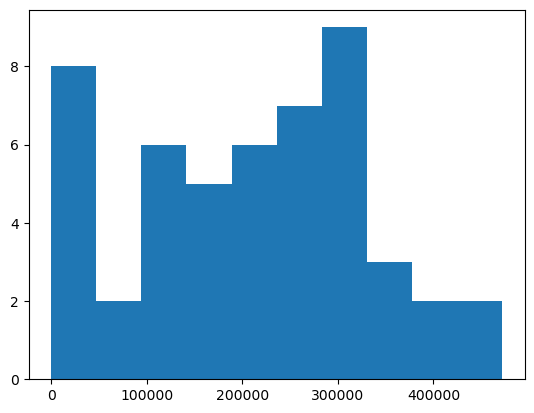

In [ ]:
# Histogram of Market Spendings
plt.hist(data=dataset,x='Marketing Spend')
plt.show()

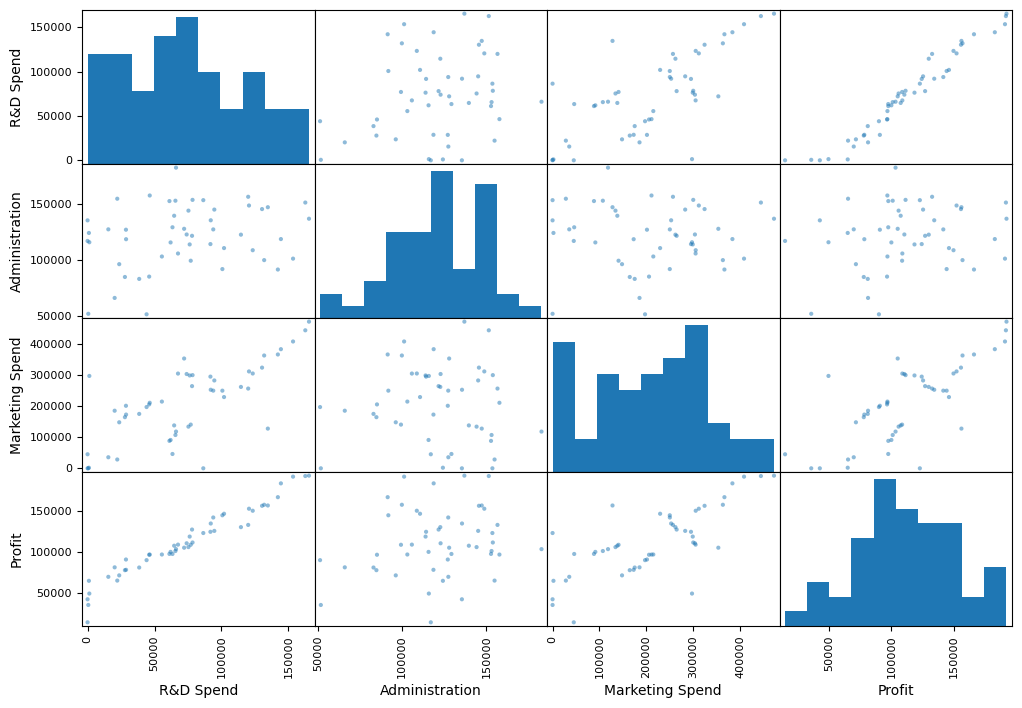

In [ ]:
# Make a sactter matrix plot together with the correlation values
attributes = ["R&D Spend", "Administration", "Marketing Spend", "Profit"]
scatter_matrix(dataset[attributes], figsize=(12, 8))
plt.show()


In [ ]:
# Experiment with the attributes
dataset['R&D Spend + Administration'] = dataset['R&D Spend'] + dataset['Administration']
dataset['R&D Spend + Marketing Spend'] = dataset['R&D Spend'] + dataset['Marketing Spend']
dataset['Administration + Marketing Spend'] = dataset['Administration'] + dataset['Marketing Spend']
dataset['R&D Spend + Administration + Marketing Spend'] = dataset['R&D Spend'] + dataset['Administration'] + dataset['Marketing Spend']
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York,R&D Spend + Administration,R&D Spend + Marketing Spend,Administration + Marketing Spend,R&D Spend + Administration + Marketing Spend
0,165349.20,136897.80,471784.10,New York,192261.83,0.0,0.0,1.0,302247.00,637133.30,608681.90,774031.10
1,162597.70,151377.59,443898.53,California,191792.06,1.0,0.0,0.0,313975.29,606496.23,595276.12,757873.82
2,153441.51,101145.55,407934.54,Florida,191050.39,0.0,1.0,0.0,254587.06,561376.05,509080.09,662521.60
3,144372.41,118671.85,383199.62,New York,182901.99,0.0,0.0,1.0,263044.26,527572.03,501871.47,646243.88
4,142107.34,91391.77,366168.42,Florida,166187.94,0.0,1.0,0.0,233499.11,508275.76,457560.19,599667.53


In [ ]:
# Get the correlations of the data
corr = dataset.corr()

# Display Correlations of profit only
corr['Profit'].sort_values(ascending=False)

Profit                                          1.000000
R&D Spend                                       0.972900
R&D Spend + Administration + Marketing Spend    0.872598
R&D Spend + Marketing Spend                     0.857488
R&D Spend + Administration                      0.848182
Administration + Marketing Spend                0.779178
Marketing Spend                                 0.747766
Administration                                  0.200717
Florida                                         0.116244
New York                                        0.031368
California                                     -0.145837
Name: Profit, dtype: float64

Confirms that R&D Spend + Administration + Marketing Spend is the best combination

List of those with strong correlation: R&D Spend, Marketing Spend

The correlations for profit in R&D Spend: Approx. 0.97
The correlations for profit in Marketing Spend: Approx: 0.75

Indicating a high positive correlation which can be used to predict accurate profit increase in both markets

STEP 4.
Prepare the Data

In [ ]:
# Show ne training set with dropped state
X_train.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
1,162597.70,151377.59,443898.53,1.0,0.0,0.0
6,134615.46,147198.87,127716.82,1.0,0.0,0.0
27,72107.60,127864.55,353183.81,0.0,0.0,1.0
49,0.00,116983.80,45173.06,1.0,0.0,0.0
24,77044.01,99281.34,140574.81,0.0,0.0,1.0


In [ ]:
# Standardize or normalize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X_train)
x

array([[ 2.00080001e+00,  1.01279696e+00,  1.98931634e+00,
         1.30088727e+00, -6.32455532e-01, -7.22315119e-01],
       [ 1.38201406e+00,  8.74713992e-01, -5.88441657e-01,
         1.30088727e+00, -6.32455532e-01, -7.22315119e-01],
       [-2.55051076e-04,  2.35824496e-01,  1.24973974e+00,
        -7.68706115e-01, -6.32455532e-01,  1.38443731e+00],
       [-1.59480825e+00, -1.23722511e-01, -1.26140227e+00,
         1.30088727e+00, -6.32455532e-01, -7.22315119e-01],
       [ 1.08906374e-01, -7.08688300e-01, -4.83613372e-01,
        -7.68706115e-01, -6.32455532e-01,  1.38443731e+00],
       [-2.42867396e-01,  1.05655855e+00, -9.10464732e-01,
        -7.68706115e-01, -6.32455532e-01,  1.38443731e+00],
       [ 9.37712436e-01,  6.24174765e-02,  5.04514405e-01,
        -7.68706115e-01, -6.32455532e-01,  1.38443731e+00],
       [-5.77276078e-01, -1.17903788e+00,  4.58508395e-02,
        -7.68706115e-01, -6.32455532e-01,  1.38443731e+00],
       [ 7.09785828e-02,  7.73502869e-01, -5.368

Step 5.
Select and train a model

In [ ]:
# Apply Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression(copy_X=True, fit_intercept=True)

# fit the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# check score on test data
model.score(X_test,y_test)

0.9630682059435252

In [ ]:
# Test data predictions
y_pred = model.predict(X_test)
y_pred

array([132369.62919462, 126851.28848927,  96080.1785803 ,  59352.91795638,
       127669.47747379, 194754.11125523,  75156.33193447, 127468.80878187,
       103253.40952766, 153885.86580646, 121535.22306947,  45954.33222773,
       132589.02096063,  73048.84813282, 163966.73137983])

In [ ]:
# compute the mean and the root mean square of the performance measure on a manually selected subset (5-10 data) of the training data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

MSE: 60982379.925908454
RMSE: 7809.12158478202
MAE: 6597.250174838821
R-squared: 0.9630682059435252


Output with Coefficient of deteremination shows a high accurate predicition.


In [ ]:
# Apply Ridge Regression
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)

# Model makes predictions
y_pred = model.predict(X_train)
y_pred

array([189027.6689742 , 153787.67460312, 118525.69326286,  47761.16423128,
       112421.58174744,  98870.61842937, 146513.95877868,  91587.26265014,
       108682.89587871, 158720.85397261, 116662.41480189,  47561.75459875,
       174425.61113357, 109753.37717429,  64379.65142158, 168712.68349236,
       116592.80003596,  76062.69713245, 148067.23656847,  61609.11875914,
       101166.22586379,  86850.51279549,  82183.27912147, 152507.91020977,
        95993.12402987,  96609.690772  , 114839.63237091,  69894.73009249,
       114120.85182526, 132733.94403187,  70880.53210547,  90855.88415454,
       101538.90914909, 179289.68063093,  49090.02520017])

<AxesSubplot:xlabel='Profit', ylabel='Density'>

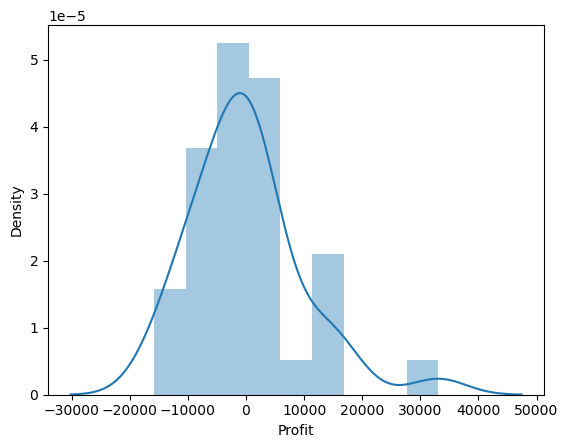

In [ ]:
# Display the accuracy of our model compared to the training set
sns.distplot(y_pred - y_train)

Step 6. Fine tune and test the model

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}

grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'r2', cv = 10, n_jobs = -1)
grid_search.fit(X_train, y_train)

# Fine tune and test the model
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(best_accuracy)
print(best_parameters)


0.853781196980329
{'alpha': 1000000}


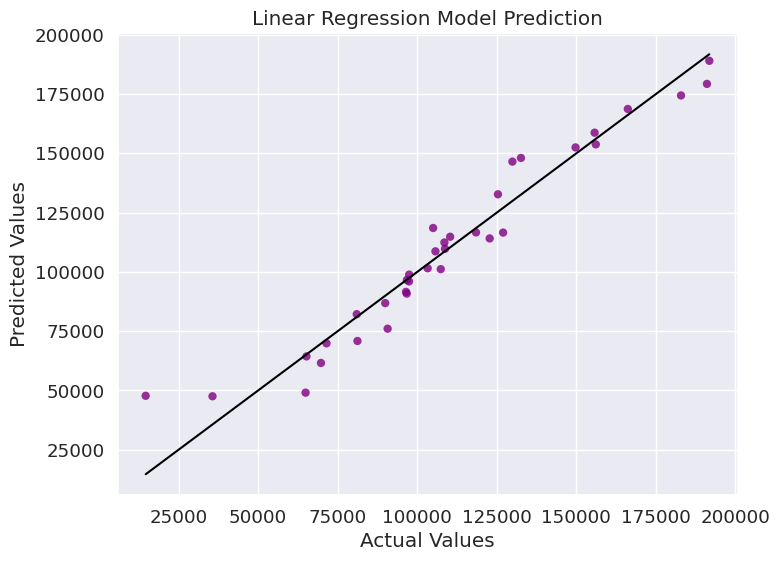

In [ ]:
# Visualizing data
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
sns.set_palette('dark')
sns.set(font_scale=1.2)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=y_pred, alpha=0.8, edgecolor='none', color='purple')
sns.lineplot(x=y_train, y=y_train, color='black')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model Prediction')
plt.show()

Trying RandomForestRegressor model 

In [ ]:
#model 2 random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error,r2_score
model2=RandomForestRegressor(n_estimators=500,max_depth=17)

model2.fit(X_train,y_train)
pred=model2.predict(X_test)
mape=mean_absolute_percentage_error(pred,y_test)
r2=r2_score(pred,y_test)
print(mape,r2)

0.09405505979333945 0.9207228729948225


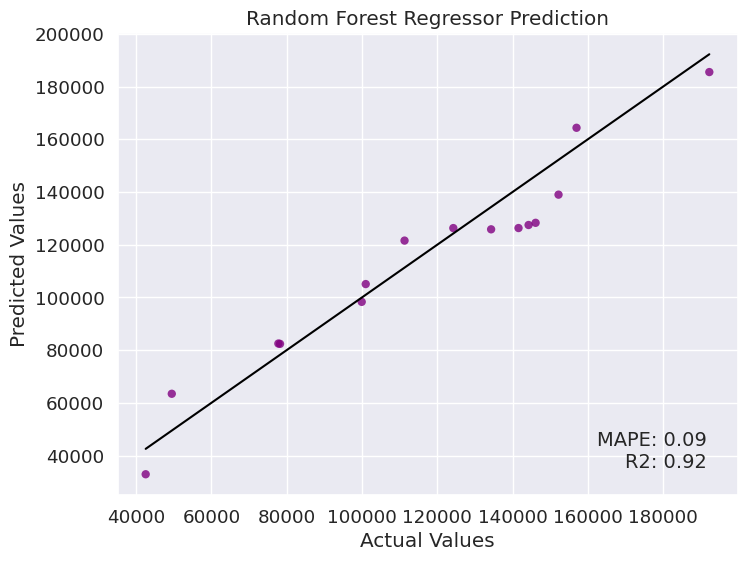

In [ ]:
sns.set_style('whitegrid')
sns.set_palette('dark')
sns.set(font_scale=1.2)

fig, ax = plt.subplots(figsize=(8, 6))

# scatter plot of actual vs predicted values
sns.scatterplot(x=y_test, y=pred, alpha=0.8, edgecolor='none', color='purple', ax=ax)

# add diagonal perfect prediction line
sns.lineplot(x=y_test, y=y_test, color='black', ax=ax)

# set axis labels and title
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Random Forest Regressor Prediction')

# add mape and r2 score as text in the plot
ax.text(0.95, 0.05, f"MAPE: {mape:.2f}\nR2: {r2:.2f}", transform=ax.transAxes,
        horizontalalignment='right', verticalalignment='bottom', fontsize=14)

plt.show()